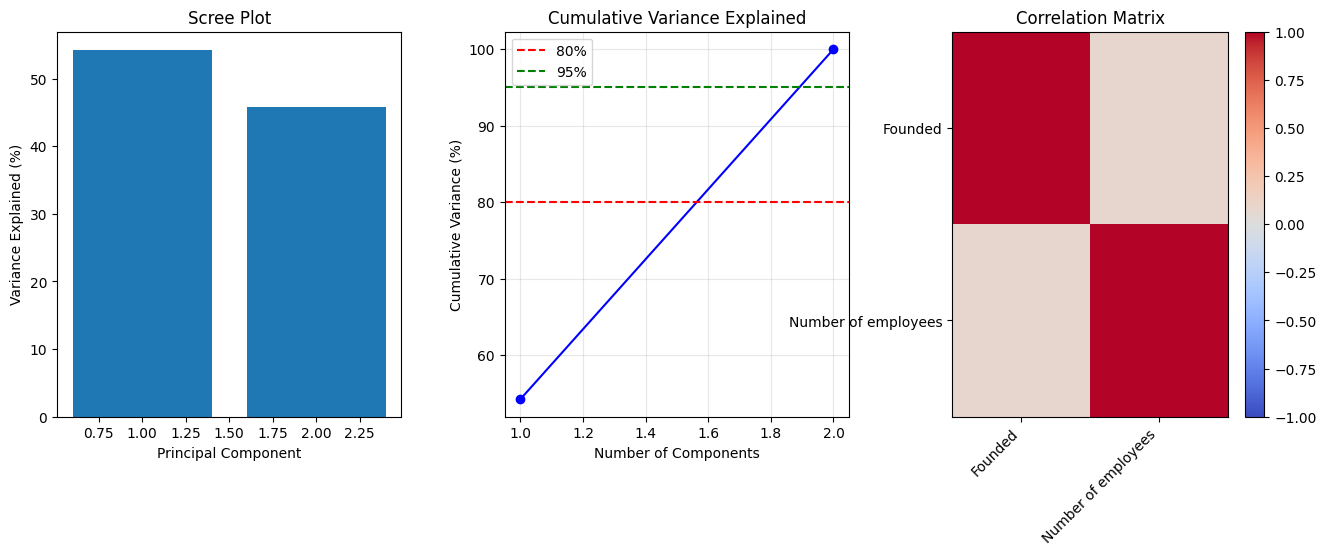

Variance Explained:
   PC  Variance (%)  Cumulative (%)
0   1         54.21           54.21
1   2         45.79          100.00

Components for 80% variance: 2
Components for 95% variance: 2

Component Loadings (PC1 & PC2):
                       PC1    PC2
Founded              0.707 -0.707
Number of employees  0.707  0.707


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df: pd.DataFrame = pd.read_csv("./datasets/organizations.csv", index_col="Index")
X: np.ndarray = df.select_dtypes(include=["number"]).values
feature_names: pd.Index = df.select_dtypes(include=["number"]).columns
n_samples, n_features = X.shape

# Standardize the data (z-score normalization)
X_standardized: np.ndarray = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

# Compute correlation matrix
corr_matrix: np.ndarray = np.corrcoef(X_standardized.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)

# Sort in descending order
idx: np.ndarray = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculate variance explained
variance_explained: np.ndarray = eigenvalues / eigenvalues.sum()
cumulative_variance: np.ndarray = np.cumsum(variance_explained)

# Create visualization
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1, 3, wspace=0.3)

# Scree plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(range(1, n_features + 1), variance_explained * 100)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Variance Explained (%)")
ax1.set_title("Scree Plot")

# Cumulative variance
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(range(1, n_features + 1), cumulative_variance * 100, "bo-")
ax2.axhline(80, color="r", linestyle="--", label="80%")
ax2.axhline(95, color="g", linestyle="--", label="95%")
ax2.set_xlabel("Number of Components")
ax2.set_ylabel("Cumulative Variance (%)")
ax2.set_title("Cumulative Variance Explained")
ax2.legend()
ax2.grid(alpha=0.3)

# Correlation heatmap
ax3 = fig.add_subplot(gs[0, 2])
im = ax3.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, aspect="auto")
ax3.set_xticks(range(n_features))
ax3.set_yticks(range(n_features))
ax3.set_xticklabels(feature_names, rotation=45, ha="right")
ax3.set_yticklabels(feature_names)
ax3.set_title("Correlation Matrix")
plt.colorbar(im, ax=ax3)

plt.show()

# Component loadings (first 2 PCs)
loadings: pd.DataFrame = pd.DataFrame(
    eigenvectors[:, :2], index=feature_names, columns=["PC1", "PC2"]
)

# Summary statistics
n_80: int = int(np.argmax(cumulative_variance >= 0.80) + 1)
n_95: int = int(np.argmax(cumulative_variance >= 0.95) + 1)

summary: pd.DataFrame = pd.DataFrame(
    {
        "PC": range(1, n_features + 1),
        "Variance (%)": variance_explained * 100,
        "Cumulative (%)": cumulative_variance * 100,
    }
)

print("Variance Explained:")
print(summary.round(2))
print(f"\nComponents for 80% variance: {n_80}")
print(f"Components for 95% variance: {n_95}")
print(f"\nComponent Loadings (PC1 & PC2):")
print(loadings.round(3))